# PYTHON PANDAS PART 6

## Group By

In [1]:
import pandas as pd; import numpy as np

In [2]:
df = pd.DataFrame({"key1" : list("aabbab"),
                   "key2" : ["one","two","three"]*2,
                   "data1" : np.random.randn(6),
                   "data2" : np.random.randn(6)
                  }
                 )
df

,key1,key2,data1,data2
0,a,one,-0.569021,0.191789
1,a,two,-0.291585,0.031469
2,b,three,0.981181,0.498471
3,b,one,-0.541557,-0.034431
4,a,two,0.741948,0.153052
5,b,three,-0.967200,0.760383


In [6]:
group = df["data1"].groupby(df["key1"])
group

In [7]:
group.mean()

key1
a   -0.039553
b   -0.175858
Name: data1, dtype: float64

In [8]:
group1 = df["data1"].groupby([df["key1"],df["key2"]])
group1

In [9]:
group1.mean()

key1  key2 
a     one     -0.569021
      two      0.225181
b     one     -0.541557
      three    0.006991
Name: data1, dtype: float64

In [10]:
group1.mean().unstack()

key2,one,three,two
key1,,,
a,-0.569021,NaN,0.225181
b,-0.541557,0.006991,NaN


In [11]:
df.groupby("key1").mean()

C:\Users\erdem\AppData\Local\Temp\ipykernel_8744\142431825.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("key1").mean()


,data1,data2
key1,,
a,-0.039553,0.125437
b,-0.175858,0.408141


In [12]:
df.groupby([df["key1"],df["key2"]]).mean()

data1     data2
key1 key2                     
a    one   -0.569021  0.191789
     two    0.225181  0.092260
b    one   -0.541557 -0.034431
     three  0.006991  0.629427

In [13]:
for name, gr in df.groupby("key1"):
    print(name)
    print(gr)

a
  key1 key2     data1     data2
0    a  one -0.569021  0.191789
1    a  two -0.291585  0.031469
4    a  two  0.741948  0.153052
b
  key1   key2     data1     data2
2    b  three  0.981181  0.498471
3    b    one -0.541557 -0.034431
5    b  three -0.967200  0.760383


In [14]:
for (x1,x2), gr in df.groupby([df["key1"],df["key2"]]):
    print(x1,x2)
    print(gr)

a one
  key1 key2     data1     data2
0    a  one -0.569021  0.191789
a two
  key1 key2     data1     data2
1    a  two -0.291585  0.031469
4    a  two  0.741948  0.153052
b one
  key1 key2     data1     data2
3    b  one -0.541557 -0.034431
b three
  key1   key2     data1     data2
2    b  three  0.981181  0.498471
5    b  three -0.967200  0.760383


In [15]:
piece = dict(list(df.groupby("key1")))
piece["a"]

,key1,key2,data1,data2
0,a,one,-0.569021,0.191789
1,a,two,-0.291585,0.031469
4,a,two,0.741948,0.153052


In [16]:
game = pd.read_csv("C:\\Users\\erdem\\Desktop\\Data 101\\Pandas 101\\vgsales.csv")
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
game.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [18]:
game.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [19]:
game.Global_Sales.mean()

0.5374406555006628

In [20]:
group = game.groupby("Genre")
group["Global_Sales"].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [21]:
group["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [22]:
group.mean()

C:\Users\erdem\AppData\Local\Temp\ipykernel_8744\3928442431.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group.mean()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7973.879071,2007.909929,0.264726,0.158323,0.048236,0.056508,0.528100
Adventure,11532.787714,2008.130878,0.082271,0.049868,0.040490,0.013072,0.185879
Fighting,7646.511792,2004.630383,0.263667,0.119481,0.103007,0.043255,0.529375
Misc,8561.847039,2007.258480,0.235906,0.124198,0.061967,0.043312,0.465762
Platform,6927.251693,2003.820776,0.504571,0.227573,0.147596,0.058228,0.938341
Puzzle,9627.381443,2005.243433,0.212680,0.087251,0.098471,0.021564,0.420876
Racing,7961.515612,2004.840131,0.287766,0.190865,0.045388,0.061865,0.586101
Role-Playing,8086.174731,2007.055744,0.219946,0.126384,0.236767,0.040060,0.623233
Shooter,7369.367939,2005.918877,0.444733,0.239137,0.029221,0.078389,0.791885


<Axes: xlabel='Genre'>

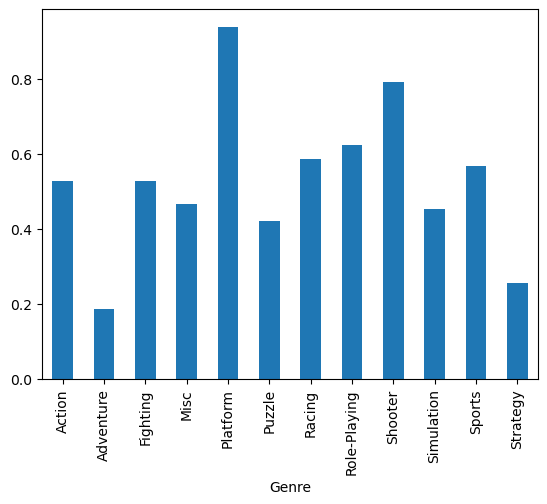

In [25]:
%matplotlib inline

group["Global_Sales"].mean().plot(kind = "bar")

In [26]:
fruit = pd.DataFrame(np.random.randn(4,4),
                     columns = list("abcd"),
                     index = ["apple","melon","banana","peach"]
                    )
fruit

,a,b,c,d
apple,0.604332,-0.285316,0.376414,-2.387690
melon,1.385537,-0.392439,0.137825,-0.559722
banana,1.107655,-1.043865,-0.786713,-0.309842
peach,-1.572655,0.192378,-0.355807,-0.632196


In [28]:
label = {"a":"green",
         "b":"yellow",
         "c":"green",
         "d":"yellow",
         "e":"purple"
        }
label

{'a': 'green', 'b': 'yellow', 'c': 'green', 'd': 'yellow', 'e': 'purple'}

In [29]:
group = fruit.groupby(label, axis = 1) # groupby to columns
group.mean()

,green,yellow
apple,0.490373,-1.336503
melon,0.761681,-0.476080
banana,0.160471,-0.676854
peach,-0.964231,-0.219909


In [30]:
group.sum()

,green,yellow
apple,0.980746,-2.673006
melon,1.523363,-0.952161
banana,0.320941,-1.353707
peach,-1.928463,-0.439818


In [31]:
s = pd.Series(label)
s

a     green
b    yellow
c     green
d    yellow
e    purple
dtype: object

In [32]:
group = fruit.groupby(s, axis = 1) # groupby to columns
group.count()

,green,yellow
apple,2,2
melon,2,2
banana,2,2
peach,2,2


In [35]:
fruit.groupby(len).sum() # Grouping was done according to the number of letters

,a,b,c,d
5,0.417214,-0.485377,0.158432,-3.579608
6,1.107655,-1.043865,-0.786713,-0.309842


In [36]:
data = pd.DataFrame(np.random.randn(4,5),
                    columns = [list("AAABB"),
                               [1,2,3,1,2]
                              ],
                   )
data.columns.names = ["letter","count"]
data

letter         A                             B          
count          1         2         3         1         2
0       1.254344  0.311721  0.209542  1.165925 -0.871227
1       0.334440 -0.890603 -0.738667  1.080398  0.093208
2      -0.551850  0.268436 -0.440442  1.317173  0.156696
3      -0.815816  1.510983  0.122899 -0.260706  0.282602

In [37]:
data.groupby(level = "letter", axis = 1).sum()

letter,A,B
0,1.775608,0.294699
1,-1.294830,1.173607
2,-0.723856,1.473869
3,0.818066,0.021896


In [39]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
group = game.groupby("Genre")

<Axes: xlabel='Genre'>

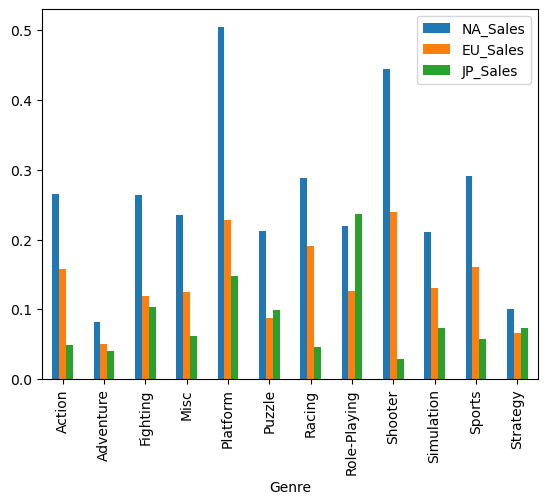

In [42]:
group[["NA_Sales","EU_Sales","JP_Sales"]].mean().plot(kind = "bar")

## Aggregation - Apply

In [43]:
df = pd.DataFrame({"key":list("ABC")*2,
                   "data1":range(6),
                   "data2":np.arange(5,11)
                  }
                 )
df

,key,data1,data2
0,A,0,5
1,B,1,6
2,C,2,7
3,A,3,8
4,B,4,9
5,C,5,10


In [44]:
group = df.groupby("key")

In [46]:
group.aggregate(["min",np.median,"max"])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     5    6.5   8
B       1    2.5   4     6    7.5   9
C       2    3.5   5     7    8.5  10

In [47]:
group.agg({"data1": "min",
           "data2":"max"
          }
         )

,data1,data2
key,,
A,0,8
B,1,9
C,2,10


In [48]:
def f(x):
    return x.max()-x.min()

group.agg(f)

,data1,data2
key,,
A,3,3
B,3,3
C,3,3


In [49]:
data = pd.DataFrame({"letter":list("ABC")*4,
                     "number":["one","two"]*6,
                     "d1":np.random.randn(12),
                     "d2":np.arange(10,33,2)
                    }
                   )
data

,letter,number,d1,d2
0,A,one,0.343957,10
1,B,two,0.217536,12
2,C,one,-0.095865,14
3,A,two,-0.865498,16
4,B,one,-1.458321,18
5,C,two,-1.328930,20
6,A,one,0.405264,22
7,B,two,1.743615,24
8,C,one,0.712868,26
9,A,two,-0.282194,28


In [50]:
group = data.groupby(["letter","number"])

In [51]:
group_v1 = group["d1"]

In [53]:
group_v1.agg("mean")

letter  number
A       one       0.374610
        two      -0.573846
B       one       0.034380
        two       0.980575
C       one       0.308502
        two      -1.552233
Name: d1, dtype: float64

In [54]:
group_v1.agg(["mean","std",f])

mean       std         f
letter number                              
A      one     0.374610  0.043351  0.061307
       two    -0.573846  0.412458  0.583303
B      one     0.034380  2.110997  2.985401
       two     0.980575  1.079101  1.526079
C      one     0.308502  0.571861  0.808733
       two    -1.552233  0.315799  0.446607

In [55]:
group_v1.agg([("col1","mean"),("col2",np.std)])

col1      col2
letter number                    
A      one     0.374610  0.043351
       two    -0.573846  0.412458
B      one     0.034380  2.110997
       two     0.980575  1.079101
C      one     0.308502  0.571861
       two    -1.552233  0.315799

In [56]:
func = ["mean","count","max"]
result = group["d1","d2"].agg(func)
result

C:\Users\erdem\AppData\Local\Temp\ipykernel_8744\1628336484.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = group["d1","d2"].agg(func)


d1                    d2          
                   mean count       max  mean count max
letter number                                          
A      one     0.374610     2  0.405264  16.0     2  22
       two    -0.573846     2 -0.282194  22.0     2  28
B      one     0.034380     2  1.527080  24.0     2  30
       two     0.980575     2  1.743615  18.0     2  24
C      one     0.308502     2  0.712868  20.0     2  26
       two    -1.552233     2 -1.328930  26.0     2  32

In [57]:
result["d1"]

mean  count       max
letter number                           
A      one     0.374610      2  0.405264
       two    -0.573846      2 -0.282194
B      one     0.034380      2  1.527080
       two     0.980575      2  1.743615
C      one     0.308502      2  0.712868
       two    -1.552233      2 -1.328930

In [58]:
group.agg({"d1":["count","max","mean"],
           "d2":"sum"
          }
         )

d1                      d2
              count       max      mean sum
letter number                              
A      one        2  0.405264  0.374610  32
       two        2 -0.282194 -0.573846  44
B      one        2  1.527080  0.034380  48
       two        2  1.743615  0.980575  36
C      one        2  0.712868  0.308502  40
       two        2 -1.328930 -1.552233  52

In [60]:
data.groupby(["letter","number"], as_index=False).mean() #We stated that we did not want hierarchical index.

,letter,number,d1,d2
0,A,one,0.374610,16.0
1,A,two,-0.573846,22.0
2,B,one,0.034380,24.0
3,B,two,0.980575,18.0
4,C,one,0.308502,20.0
5,C,two,-1.552233,26.0


In [61]:
data

,letter,number,d1,d2
0,A,one,0.343957,10
1,B,two,0.217536,12
2,C,one,-0.095865,14
3,A,two,-0.865498,16
4,B,one,-1.458321,18
5,C,two,-1.328930,20
6,A,one,0.405264,22
7,B,two,1.743615,24
8,C,one,0.712868,26
9,A,two,-0.282194,28


In [62]:
group = data.groupby("letter")

In [63]:
group["d2"].apply(lambda x:x.describe())

letter       
A       count     4.000000
        mean     19.000000
        std       7.745967
        min      10.000000
        25%      14.500000
        50%      19.000000
        75%      23.500000
        max      28.000000
B       count     4.000000
        mean     21.000000
        std       7.745967
        min      12.000000
        25%      16.500000
        50%      21.000000
        75%      25.500000
        max      30.000000
C       count     4.000000
        mean     23.000000
        std       7.745967
        min      14.000000
        25%      18.500000
        50%      23.000000
        75%      27.500000
        max      32.000000
Name: d2, dtype: float64

In [64]:
mat = pd.DataFrame({"class":list("AB")*3,
                    "student":["erdem","joe","lisa","angela","luis","jack"],
                    "points":[60,70,np.nan,55,np.nan,80]
                   }
                  )
mat

,class,student,points
0,A,erdem,60.0
1,B,joe,70.0
2,A,lisa,NaN
3,B,angela,55.0
4,A,luis,NaN
5,B,jack,80.0


In [65]:
group = mat.groupby("class")

In [66]:
group.mean()

C:\Users\erdem\AppData\Local\Temp\ipykernel_8744\3928442431.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group.mean()


,points
class,
A,60.000000
B,68.333333


In [67]:
func = lambda f:f.fillna(f.mean())
group.apply(func)

C:\Users\erdem\AppData\Local\Temp\ipykernel_8744\154169566.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  func = lambda f:f.fillna(f.mean())
C:\Users\erdem\AppData\Local\Temp\ipykernel_8744\154169566.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  func = lambda f:f.fillna(f.mean())
C:\Users\erdem\AppData\Local\Temp\ipykernel_8744\154169566.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applie

,class,student,points
0,A,erdem,60.0
1,B,joe,70.0
2,A,lisa,60.0
3,B,angela,55.0
4,A,luis,60.0
5,B,jack,80.0


In [68]:
value = {"A":100,
         "B":50
        }
func1 = lambda f:f.fillna(value[f.name])
group.apply(func1)

C:\Users\erdem\AppData\Local\Temp\ipykernel_8744\1126708749.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  group.apply(func1)


,class,student,points
0,A,erdem,60.0
1,B,joe,70.0
2,A,lisa,100.0
3,B,angela,55.0
4,A,luis,100.0
5,B,jack,80.0


## Pivot Table

In [69]:
df = pd.DataFrame({"class":list("ABC")*4,
                   "lesson":["mat","eng"]*6,
                   "sex":list("MFMM")*3,
                   "brosis": [1,2,3]*4,
                   "points":np.arange(40,100,5)
                  }
                 )
df

,class,lesson,sex,brosis,points
0,A,mat,M,1,40
1,B,eng,F,2,45
2,C,mat,M,3,50
3,A,eng,M,1,55
4,B,mat,M,2,60
5,C,eng,F,3,65
6,A,mat,M,1,70
7,B,eng,M,2,75
8,C,mat,M,3,80
9,A,eng,F,1,85


In [70]:
df.groupby("lesson")["points"].mean()

lesson
eng    70.0
mat    65.0
Name: points, dtype: float64

In [72]:
df.groupby(["lesson","class"])["points"].aggregate("mean").unstack()

class,A,B,C
lesson,,,
eng,70.0,60.0,80.0
mat,55.0,75.0,65.0


In [73]:
df.pivot_table("points",index = "lesson", columns="class")

class,A,B,C
lesson,,,
eng,70,60,80
mat,55,75,65


In [74]:
df.pivot_table(["brosis","points"],
               index = ["class","lesson"],
               columns="sex")

brosis      points      
sex               F    M      F     M
class lesson                         
A     eng       1.0  1.0   85.0  55.0
      mat       NaN  1.0    NaN  55.0
B     eng       2.0  2.0   45.0  75.0
      mat       NaN  2.0    NaN  75.0
C     eng       3.0  3.0   65.0  95.0
      mat       NaN  3.0    NaN  65.0

In [75]:
df.pivot_table(["brosis","points"],
               index = ["class","lesson"],
               columns="sex", margins=True)

brosis           points                 
sex               F    M  All      F          M   All
class lesson                                         
A     eng       1.0  1.0  1.0   85.0  55.000000  70.0
      mat       NaN  1.0  1.0    NaN  55.000000  55.0
B     eng       2.0  2.0  2.0   45.0  75.000000  60.0
      mat       NaN  2.0  2.0    NaN  75.000000  75.0
C     eng       3.0  3.0  3.0   65.0  95.000000  80.0
      mat       NaN  3.0  3.0    NaN  65.000000  65.0
All             2.0  2.0  2.0   65.0  68.333333  67.5

In [77]:
df.pivot_table(["brosis","points"],
               index = ["class","lesson"],
               columns="sex", margins=True, fill_value=0)

brosis         points                 
sex               F  M  All      F          M   All
class lesson                                       
A     eng         1  1  1.0     85  55.000000  70.0
      mat         0  1  1.0      0  55.000000  55.0
B     eng         2  2  2.0     45  75.000000  60.0
      mat         0  2  2.0      0  75.000000  75.0
C     eng         3  3  3.0     65  95.000000  80.0
      mat         0  3  3.0      0  65.000000  65.0
All               2  2  2.0     65  68.333333  67.5

In [79]:
brosis = pd.cut(df["brosis"],[0,2,3])
df.pivot_table("points",["lesson",brosis],"class",fill_value=0)

class           A   B   C
lesson brosis            
eng    (0, 2]  70  60   0
       (2, 3]   0   0  80
mat    (0, 2]  55  75   0
       (2, 3]   0   0  65

In [81]:
df.pivot_table("points", index = "lesson", columns="class", aggfunc="sum")

class,A,B,C
lesson,,,
eng,140,120,160
mat,110,150,130


In [83]:
df.pivot_table(index = "lesson",
               columns="class",
               aggfunc={"brosis":"max",
                        "points":"sum"
                       }
              )

brosis       points          
class       A  B  C      A    B    C
lesson                              
eng         1  2  3    140  120  160
mat         1  2  3    110  150  130

In [85]:
pd.crosstab(df.brosis,df["class"])

class,A,B,C
brosis,,,
1,4,0,0
2,0,4,0
3,0,0,4


In [86]:
pd.crosstab([df.brosis,df.lesson],df["class"])

class          A  B  C
brosis lesson         
1      eng     2  0  0
       mat     2  0  0
2      eng     0  2  0
       mat     0  2  0
3      eng     0  0  2
       mat     0  0  2

In [87]:
borning = pd.read_csv("C:\\Users\\erdem\\Desktop\\Data 101\\Pandas 101\\births.csv")
borning.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [88]:
borning["tenyear"]= 10*(borning["year"]//10)
borning.pivot_table("births",index = "tenyear", columns = "gender",
                    aggfunc= "sum")

gender,F,M
tenyear,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [89]:
%matplotlib inline

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'total borning')

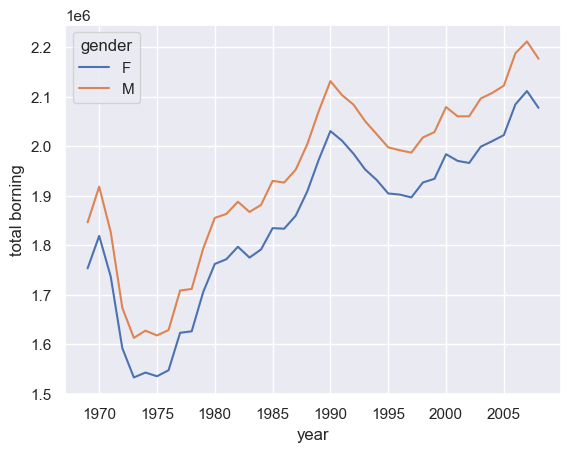

In [91]:
sns.set()
borning.pivot_table("births",index = "year", columns = "gender",
                    aggfunc= "sum").plot()
plt.ylabel("total borning")